In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, mean_absolute_error, mean_squared_error, classification_report, roc_curve, RocCurveDisplay, auc, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.manifold import TSNE
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB


# Load Dataset

In [3]:
data = pd.read_csv('../../Data/DataLaba2/neo_task.csv').dropna().drop(['id', 'name'], axis=1)
# data['name'] = pd.factorize(data['name'])[0]
data


,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,0.016016,0.035813,56014.078517,1.024333e+06,26.10,False
1,0.030518,0.068240,7864.348060,3.268186e+07,24.70,False
2,0.055533,0.124177,55257.544508,6.538636e+07,23.40,False
3,0.019256,0.043057,41531.404722,1.260796e+07,25.70,False
4,0.139494,0.311918,67639.394481,7.130590e+07,21.40,False
...,...,...,...,...,...,...
90831,0.017561,0.039268,23264.740825,1.635007e+06,25.90,False
90832,0.110804,0.247765,24802.519406,3.351901e+07,21.90,False
90833,0.035039,0.078350,116288.999548,5.471396e+07,24.40,False
90834,0.044112,0.098637,45763.317060,2.694877e+07,23.90,False


# Normalise data

In [6]:
mm_scaler = MinMaxScaler()
data_scaled = mm_scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
# data_scaled['date'] = data['date']
# data_scaled
data_scaled_x, hazardous = SMOTE().fit_resample(data_scaled.drop(['hazardous'], axis=1), data['hazardous'])
# data_scaled_x = data.drop(['Appliances', 'date'], axis=1)



In [7]:
data_scaled_x

,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
0,0.000407,0.000407,0.235700,0.013606,0.703796
1,0.000789,0.000789,0.032354,0.436880,0.645390
2,0.001450,0.001450,0.232505,0.874154,0.591156
3,0.000492,0.000492,0.174537,0.168484,0.687109
4,0.003665,0.003665,0.284797,0.953300,0.507718
...,...,...,...,...,...
159883,0.005305,0.005305,0.279517,0.827268,0.474343
159884,0.004102,0.004102,0.222321,0.246056,0.497591
159885,0.007282,0.007282,0.210827,0.115846,0.445738
159886,0.016695,0.016695,0.425735,0.817388,0.370673


In [8]:
tsne = TSNE(n_components=2)
X_pca = tsne.fit_transform(data_scaled_x, hazardous)
X_pca.shape

(159888, 2)

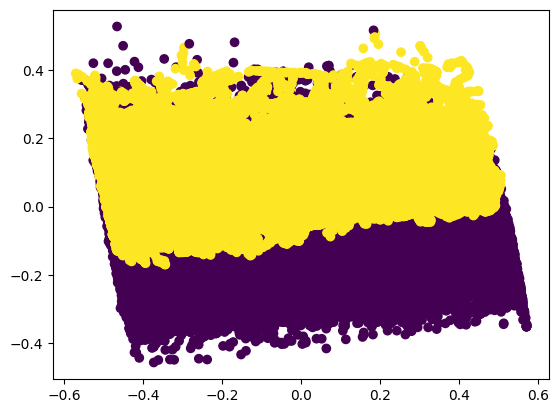

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=hazardous)

In [28]:
pca = TSNE(n_components=3)
X_pca = pca.fit_transform(data_scaled_x, hazardous)
X_pca.shape


(159888, 3)

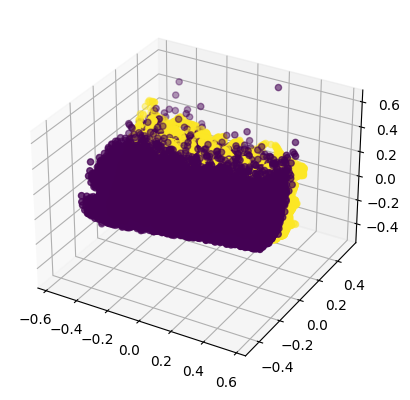

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=hazardous)

In [21]:
data_thresh_remove = []
td = []
for i in range(1, data_scaled_x.shape[1]):
    try:
        tsne = TSNE(n_components=i)
        data_thresh_remove.append(tsne.fit_transform(data_scaled_x[:5000], hazardous[:5000]))
        td.append(i)
    except ValueError:
        print(i)


4


In [29]:
ridge_optimal_for_line_regressions = []
data_splits = []
for d in data_thresh_remove:
    X_train, X_test, y_train, y_test = train_test_split(
        d, hazardous[:5000], test_size=0.2)
    data_splits.append({'X_train': X_train, 'X_test': X_test,
                       'y_train': y_train, 'y_test': y_test})
    # x = RandomizedSearchCV(SVC(), {'kernel': ['linear', 'poly', ]}, n_iter=5,
    #                        n_jobs=3,
    #                        scoring='f1',
    #                        random_state=71).fit(X_train, y_train)
    x = GaussianNB().fit(X_train, y_train)
    ridge_optimal_for_line_regressions.append(x)
    # print(1)
# ridge_optimal_for_line_regression.best_params_


# Result Analize

In [30]:
def res(y_predicted, y_test):
    print(  # f"MAE: {mean_absolute_error(y_predicted, y_test)}",
        #   f'RMSE: {mean_squared_error(y_predicted, y_test)}',
        f'accuracy_score: {accuracy_score(y_predicted, y_test)}',
        f'recall_score: {recall_score(y_predicted, y_test)}',
        f'f1_score: {f1_score(y_predicted, y_test)}',
        sep='\n')


In [31]:
i = 0
ridge_optimal_for_line_regressions[i].predict(data_splits[i]['X_test']).shape, data_splits[i]['y_test']


((1000,),
 2468    False
 3073    False
 4021     True
 1183    False
 2318     True
         ...  
 977     False
 2721    False
 4898     True
 2225    False
 4108    False
 Name: hazardous, Length: 1000, dtype: bool)

In [32]:
for i, m, d in zip(td, ridge_optimal_for_line_regressions, data_splits):
    print(f'{i}) ' + '<>'*20)
    res(m.predict(d['X_test']), d['y_test'])
    print('\n')


1) <><><><><><><><><><><><><><><><><><><><>
accuracy_score: 0.888
recall_score: 0.0
f1_score: 0.0


2) <><><><><><><><><><><><><><><><><><><><>
accuracy_score: 0.891
recall_score: 0.0
f1_score: 0.0


3) <><><><><><><><><><><><><><><><><><><><>
accuracy_score: 0.884
recall_score: 0.0
f1_score: 0.0




c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mike\Desktop\4semak\Maching_learning\Maching_Learning\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


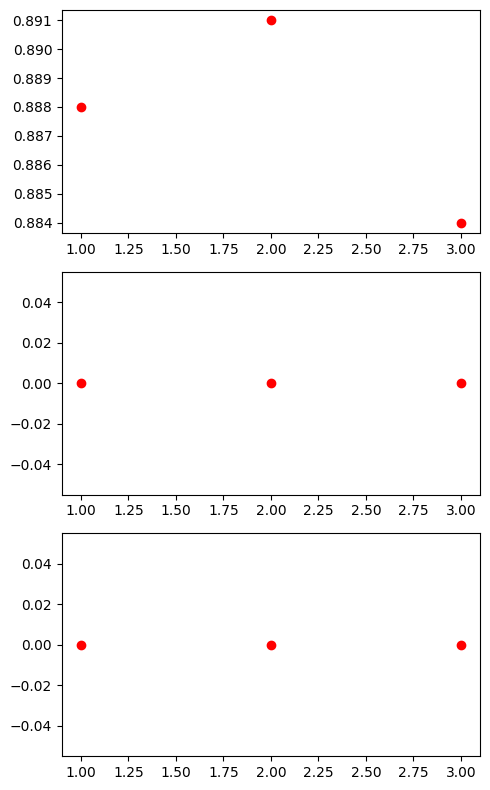

In [33]:
scores = [accuracy_score, recall_score, f1_score]
fig = plt.figure(tight_layout=True)
fig.set_figheight(8)
fig.set_figwidth(5)
gs = gridspec.GridSpec(len(scores), 1)
for s in range(len(scores)):
    x = []
    y = []
    for i, m, d in zip(td, ridge_optimal_for_line_regressions, data_splits):
        x.append(i)
        y.append(scores[s](m.predict(d['X_test']), d['y_test']))
        # print(x, y)
    ax = fig.add_subplot(gs[s, 0])
    ax.scatter(x, y, c='red')
